In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

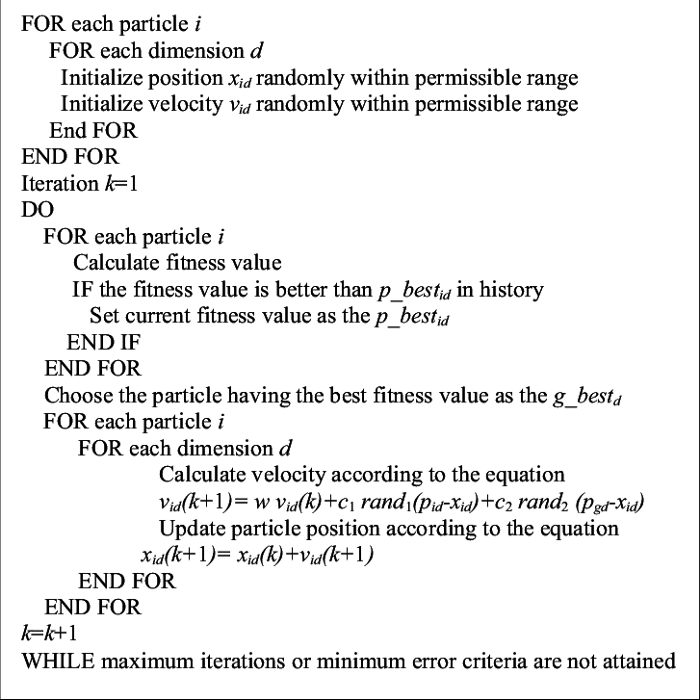

# Rastrigin pra 1 particula (fitness)

In [2]:
def rastrigin(part):
    part_x = 10 + part[0]**2 - 10*math.cos(2*math.pi*part[0])
    part_y = 10 + part[1]**2 - 10*math.cos(2*math.pi*part[1])
    part_z = 10 + part[2]**2 - 10*math.cos(2*math.pi*part[2])
    result = part_x + part_y + part_z
    return result

In [3]:
rastrigin([0,0,0])

0.0

# Inicialização de todas as particulas  (primeiro laço For)
 
 Posição de -5.12 até 5.12, velocidades 0

In [4]:
def inicia_particulas(qnt_part,seed):
  random.seed(seed)
  enxame = {}
  
  enxamePos = []
  enxameVel = []
  enxameBestVal = []
  enxameBestPos = []
  for i in range(qnt_part):
    partPos = []
    partVel = []
    for j in range(3):
      rand1 = random.uniform(-5.12,5.12)
      partPos.append(rand1)
      #rand = random.uniform(-1,1)
      rand2 = 0
      partVel.append(rand2)
    inicBL = rastrigin(partPos)
    enxameBestPos.append(partPos)
    enxameBestVal.append(inicBL)
    enxamePos.append(partPos)
    enxameVel.append(partVel)
  enxame['Pos'] = enxamePos
  enxame['Vel'] = enxameVel
  enxame['Loc'] = enxameBestVal
  enxame['PosLoc'] = enxameBestPos

  return enxame

In [5]:
enx = inicia_particulas(10,2)
print(enx)

{'Pos': [[4.669790944145913, 4.585753467487737, -4.540913994477479], [-4.250910769572642, 3.435508512045563, 2.4163326880616784], [1.7380393107478618, -1.9646826742871633, 1.0848682565474554], [1.0936497524821798, 0.8315291352269121, -3.4981594085907908], [-0.7099428834174093, -1.0902341610969977, 2.28364371187165], [5.066952324605366, 4.601809644474815, 0.4523729656762452], [-0.5646931074472592, -2.37321480551088, -4.752134867017138], [-4.838964663390014, -0.35948685212352416, -1.8589170907783434], [-1.228647199736713, 4.011924048161663, 0.2637083560553295], [0.6196260969113485, -2.7020963111417644, -4.875693269598391]], 'Vel': [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], 'Loc': [116.53964062870543, 83.60878109017938, 20.44207301871513, 40.904259918303225, 33.06083455490799, 85.50555500012443, 74.5761767866031, 51.72485070291513, 37.22534533616895, 64.6262292686573], 'PosLoc': [[4.669790944145913, 4.585753467487737, -4

# Encontrar melhor partícula local (segundo laço for)

In [6]:
def best_particula_local(enxame,qnt_part):
  for i in range(qnt_part):
    result = rastrigin(enxame['Pos'][i])
    if result <= enxame['Loc'][i]:
      enxame['Loc'][i] = result
      enxame['PosLoc'][i] = enxame['Pos'][i].copy()

  return enxame

In [7]:
best_particula_local(enx,10)
print(enx['Loc'])
enx['Pos'][1] = [0.1,0.1,0.1]
best_particula_local(enx,10)
print(enx['Loc'])
print(enx['PosLoc'])

[116.53964062870543, 83.60878109017938, 20.44207301871513, 40.904259918303225, 33.06083455490799, 85.50555500012443, 74.5761767866031, 51.72485070291513, 37.22534533616895, 64.6262292686573]
[116.53964062870543, 5.759490168751576, 20.44207301871513, 40.904259918303225, 33.06083455490799, 85.50555500012443, 74.5761767866031, 51.72485070291513, 37.22534533616895, 64.6262292686573]
[[4.669790944145913, 4.585753467487737, -4.540913994477479], [0.1, 0.1, 0.1], [1.7380393107478618, -1.9646826742871633, 1.0848682565474554], [1.0936497524821798, 0.8315291352269121, -3.4981594085907908], [-0.7099428834174093, -1.0902341610969977, 2.28364371187165], [5.066952324605366, 4.601809644474815, 0.4523729656762452], [-0.5646931074472592, -2.37321480551088, -4.752134867017138], [-4.838964663390014, -0.35948685212352416, -1.8589170907783434], [-1.228647199736713, 4.011924048161663, 0.2637083560553295], [0.6196260969113485, -2.7020963111417644, -4.875693269598391]]


# Encontrar Melhor particula global 

In [8]:
def best_global(enxame,qnt_part,best_g_value,best_g_pos):
  for i in range(qnt_part):
    best_l_value = enxame['Loc'][i]
    best_l_pos = enxame['PosLoc'][i]
    if best_l_value < best_g_value:
      best_g_value = best_l_value
      best_g_pos[0] = best_l_pos[0]
      best_g_pos[1] = best_l_pos[1]
      best_g_pos[2] = best_l_pos[2]
  return best_g_value,best_g_pos

In [9]:
bg = 10000
pos = [1,1,1]
bg,pos = best_global(enx,10,bg,pos)
print(bg,pos)

5.759490168751576 [0.1, 0.1, 0.1]


# Calcular a nova velocidade e posição (terceiro laço For)

In [10]:
def calc_vel_pos(enxame,qnt_part,w_inertia,c1_personal_best,c2_social_best,pos_best_global,lim_vel,lim_pos):
  for i in range(qnt_part):
    for j in range(3):
      v_ant = enxame['Vel'][i][j]
      p_local = enxame['PosLoc'][i][j]
      posicao = enxame['Pos'][i][j]
      p_global = pos_best_global[j]
      #atualiza velocidade em dimensao j
#      r1 = random.uniform(0,1)
#      r2 = random.uniform(0,1)
      r1 = 1
      r2 = 1
      vid = w_inertia * v_ant + c1_personal_best * r1 * (p_local - posicao) + c2_social_best * r2 * (p_global - posicao)

      if vid > lim_vel:
        vid = lim_vel
      elif vid < -lim_vel:
        vid = -lim_vel

      #atualiza posicao em dimensao j
      pid = posicao + vid   

      if pid > lim_pos:
        pid = lim_pos
      elif pid < -lim_pos:
        pid = -lim_pos

      enxame['Vel'][i][j] = vid
      enxame['Pos'][i][j] = pid
      
  return enxame

# Plot aproveitado do algoritmo de GA

Foi retirado o plot da média por iteração pq ela não mostra nada para PSO

In [11]:
def plot_resultados(resultados):
    
    # Resultado Geral
    plt.figure(figsize=(20,10))
    plt.plot(resultados, 'blue')
    plt.title('Resultado Geral')
    plt.xlabel('Geração')
    plt.ylabel('f(x)')
    plt.legend(['Melhor Performance da Geração'])
    plt.grid()
    plt.show()

# PSO 

Junta todas as funções geradas

In [12]:
def PSO(qnt_part,n_inter,w_inertia,c1_personal_best,c2_social_best,lim_vel,lim_pos,seed):
  #inicia enxame
  enxame = inicia_particulas(qnt_part,seed)
  bg = 10000000
  pos_bg = [-20,-20,-20]
  #itera a atualizacao das particulas
  resultados = []
  for i in range(n_iter):
    #melhor local
    enxame = best_particula_local(enxame,qnt_part)

    #melhor global
    bg,pos_bg = best_global(enxame,qnt_part,bg,pos_bg)

    #novas posicoes e velocidades
    enxame = calc_vel_pos(enxame,qnt_part,w_inertia,c1_personal_best,c2_social_best,pos_bg,lim_vel,lim_pos)
    
    #pegar melhor resultado da iteração   
    resultados.append(bg)
    
    if i == (n_iter - 1):
      print('O valor mínimo obtido foi', bg)
      print('Os valores numéricos de entrada que trouxeram esse resultado foram', pos_bg)
  
  plot_resultados(resultados)
  return bg,pos_bg

O valor mínimo obtido foi 1.0051959149577545
Os valores numéricos de entrada que trouxeram esse resultado foram [0.0023009853086310567, -0.002940888451005541, -0.9888190255612089]


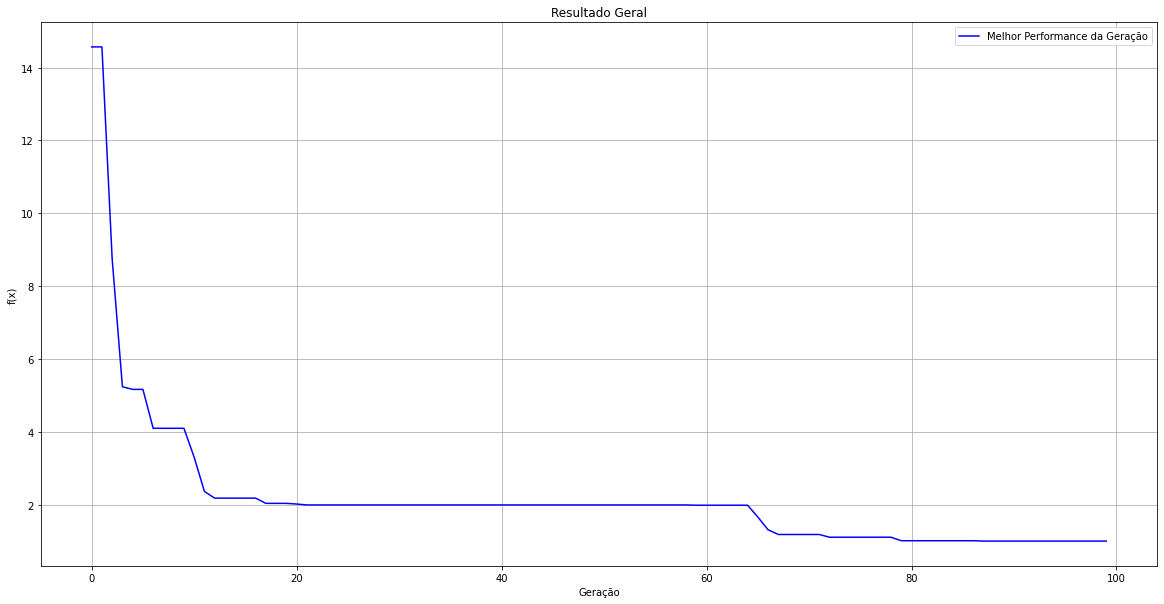

CPU times: user 304 ms, sys: 12.9 ms, total: 317 ms
Wall time: 321 ms


In [13]:
#Teste 1
%%time

qnt_part = 100
n_iter = 100
w_inertia = 1      #existe, mas n mexeremos
c1_personal_best = 0.1
c2_social_best = 0.1
lim_velocidade = 2  #saturação
lim_pos = 5.12    #limitar posição, para seguir a exigencia da função rastrigin
seed = 42

minimumPSO,pointMin = PSO(qnt_part,n_iter,w_inertia,c1_personal_best,c2_social_best,lim_velocidade,lim_pos,seed)

O valor mínimo obtido foi 0.19066877264394577
Os valores numéricos de entrada que trouxeram esse resultado foram [0.022385415864060704, 0.0167559531053475, 0.013430839900913788]


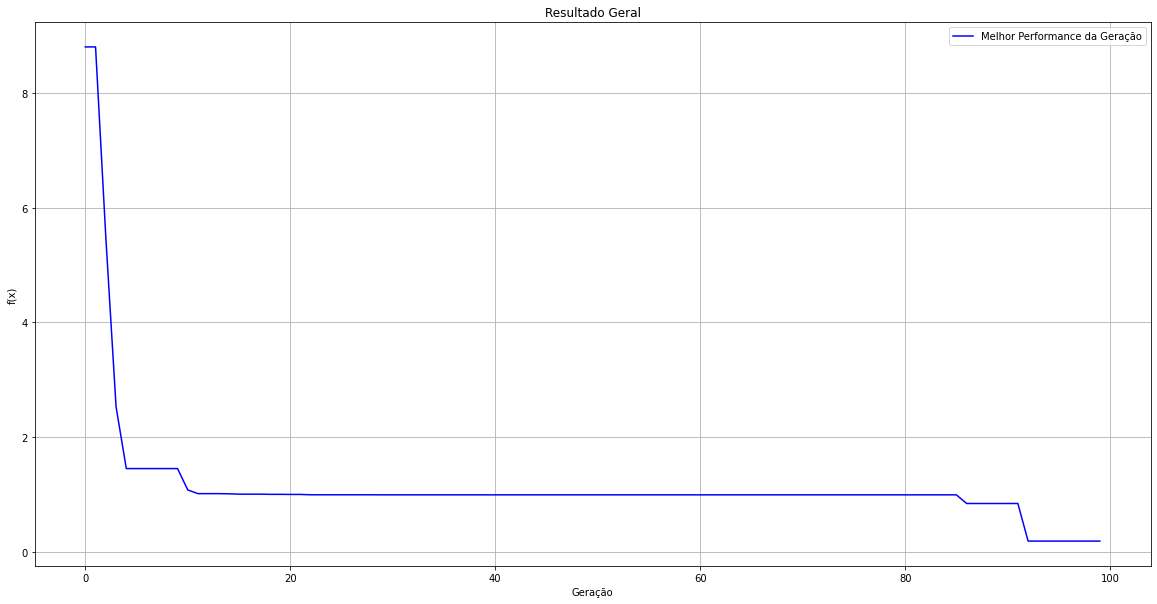

CPU times: user 515 ms, sys: 7.99 ms, total: 523 ms
Wall time: 527 ms


In [14]:
#Teste 2
%%time

qnt_part = 500
n_iter = 100
w_inertia = 1      #existe, mas n mexeremos
c1_personal_best = 0.1
c2_social_best = 0.1
lim_velocidade = 2  #saturação
lim_pos = 5.12    #limitar posição, para seguir a exigencia da função rastrigin
seed = 42

minimumPSO,pointMin = PSO(qnt_part,n_iter,w_inertia,c1_personal_best,c2_social_best,lim_velocidade,lim_pos,seed)

O valor mínimo obtido foi 0.0022280053943450895
Os valores numéricos de entrada que trouxeram esse resultado foram [4.6754072283258785e-05, -0.0024132556553735918, 0.002324764843369992]


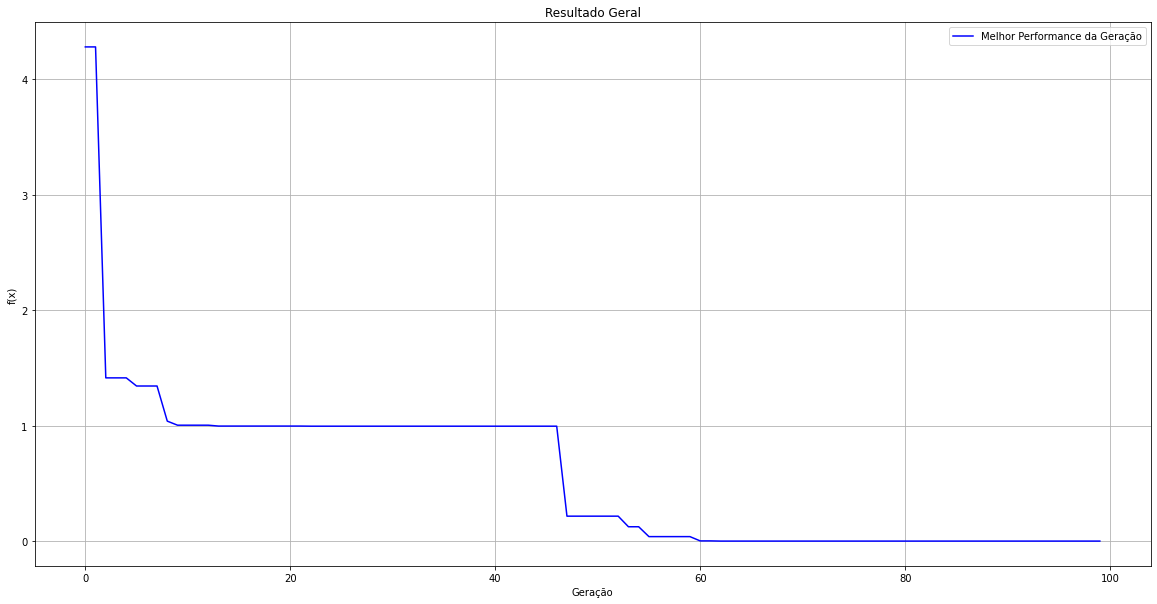

CPU times: user 780 ms, sys: 8.35 ms, total: 789 ms
Wall time: 797 ms


In [15]:
#Teste 3
%%time

qnt_part = 1000
n_iter = 100
w_inertia = 1      #existe, mas n mexeremos
c1_personal_best = 0.1
c2_social_best = 0.1
lim_velocidade = 2  #saturação
lim_pos = 5.12    #limitar posição, para seguir a exigencia da função rastrigin
seed = 42

minimumPSO,pointMin = PSO(qnt_part,n_iter,w_inertia,c1_personal_best,c2_social_best,lim_velocidade,lim_pos,seed)

O valor mínimo obtido foi 0.011141364052079439
Os valores numéricos de entrada que trouxeram esse resultado foram [-0.001152040057721626, 0.00677733480080657, -0.0029842948764418342]


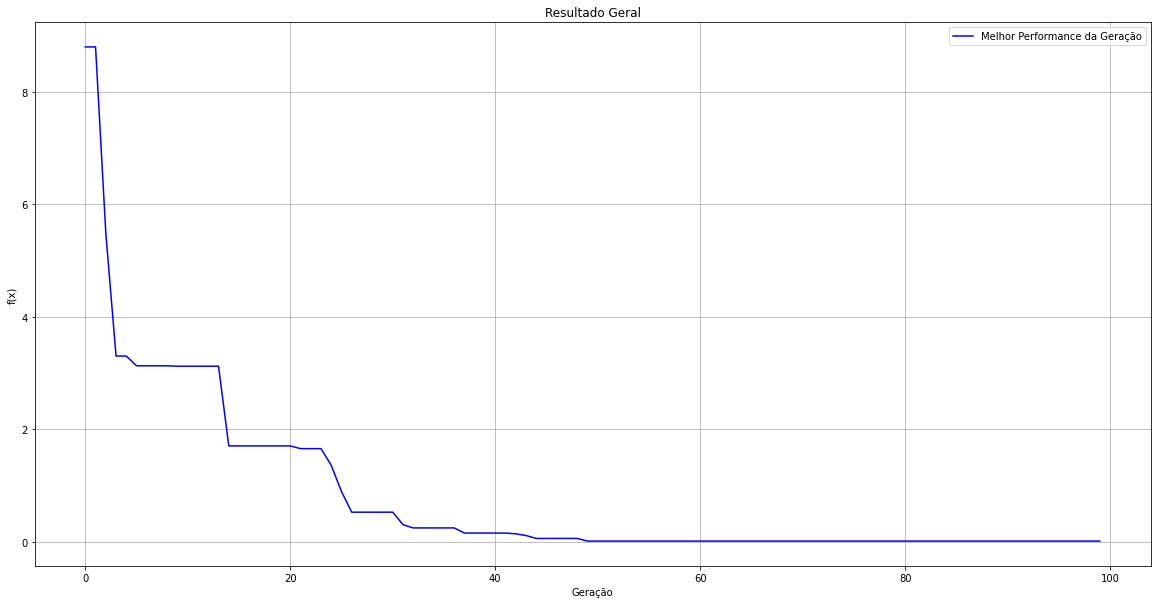

CPU times: user 498 ms, sys: 5.84 ms, total: 504 ms
Wall time: 512 ms


In [23]:
#Teste 4
%%time

qnt_part = 500
n_iter = 100
w_inertia = 1      #existe, mas n mexeremos
c1_personal_best = 0.5
c2_social_best = 0.1
lim_velocidade = 2  #saturação
lim_pos = 5.12    #limitar posição, para seguir a exigencia da função rastrigin
seed = 42

minimumPSO,pointMin = PSO(qnt_part,n_iter,w_inertia,c1_personal_best,c2_social_best,lim_velocidade,lim_pos,seed)

O valor mínimo obtido foi 0.16168051072802925
Os valores numéricos de entrada que trouxeram esse resultado foram [0.00876997096987514, -0.008875552538830267, -0.02570474763970304]


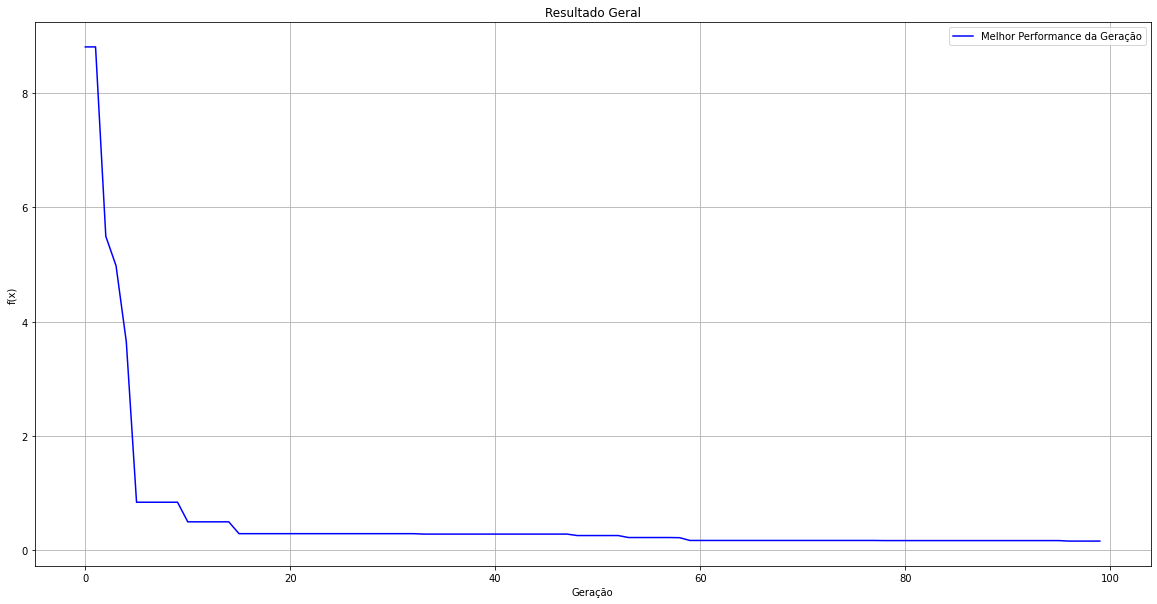

CPU times: user 605 ms, sys: 2.89 ms, total: 608 ms
Wall time: 615 ms


In [25]:
#Teste 5
%%time

qnt_part = 500
n_iter = 100
w_inertia = 1      #existe, mas n mexeremos
c1_personal_best = 1
c2_social_best = 0.1
lim_velocidade = 2  #saturação
lim_pos = 5.12    #limitar posição, para seguir a exigencia da função rastrigin
seed = 42

minimumPSO,pointMin = PSO(qnt_part,n_iter,w_inertia,c1_personal_best,c2_social_best,lim_velocidade,lim_pos,seed)

O valor mínimo obtido foi 1.1071385288692692
Os valores numéricos de entrada que trouxeram esse resultado foram [-0.018611072856301147, -0.9942120610941727, -0.014800801876764136]


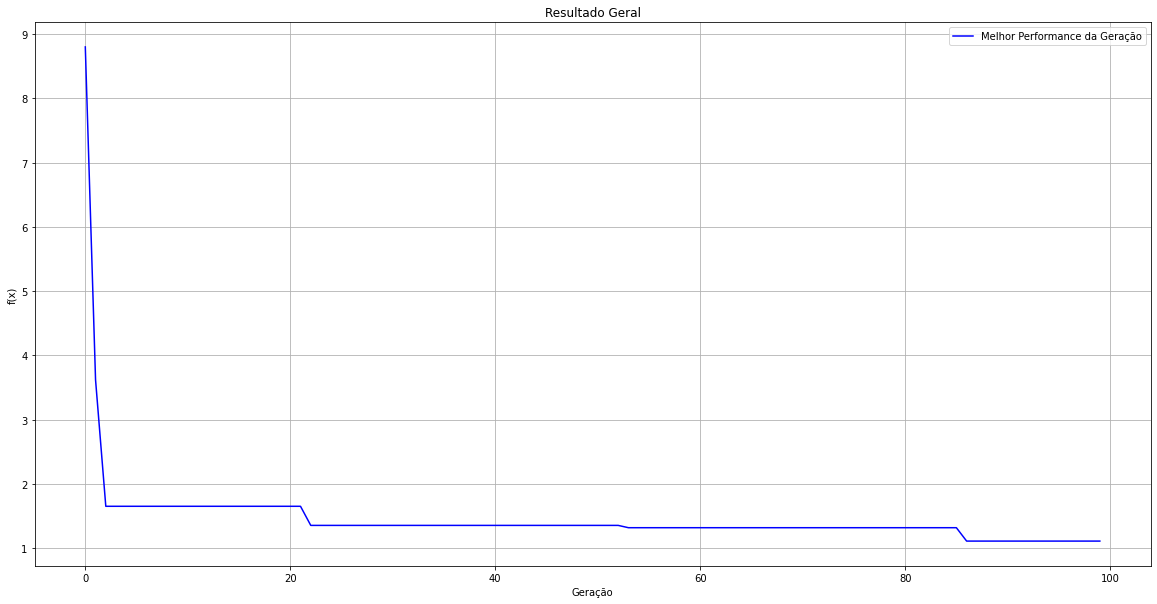

CPU times: user 547 ms, sys: 5.7 ms, total: 553 ms
Wall time: 565 ms


In [26]:
#Teste 6
%%time

qnt_part = 500
n_iter = 100
w_inertia = 1      #existe, mas n mexeremos
c1_personal_best = 0.1
c2_social_best = 0.5
lim_velocidade = 2  #saturação
lim_pos = 5.12    #limitar posição, para seguir a exigencia da função rastrigin
seed = 42

minimumPSO,pointMin = PSO(qnt_part,n_iter,w_inertia,c1_personal_best,c2_social_best,lim_velocidade,lim_pos,seed)

O valor mínimo obtido foi 1.1716710317034629
Os valores numéricos de entrada que trouxeram esse resultado foram [0.013846639742846056, 1.021003052911739, 0.004634636223598054]


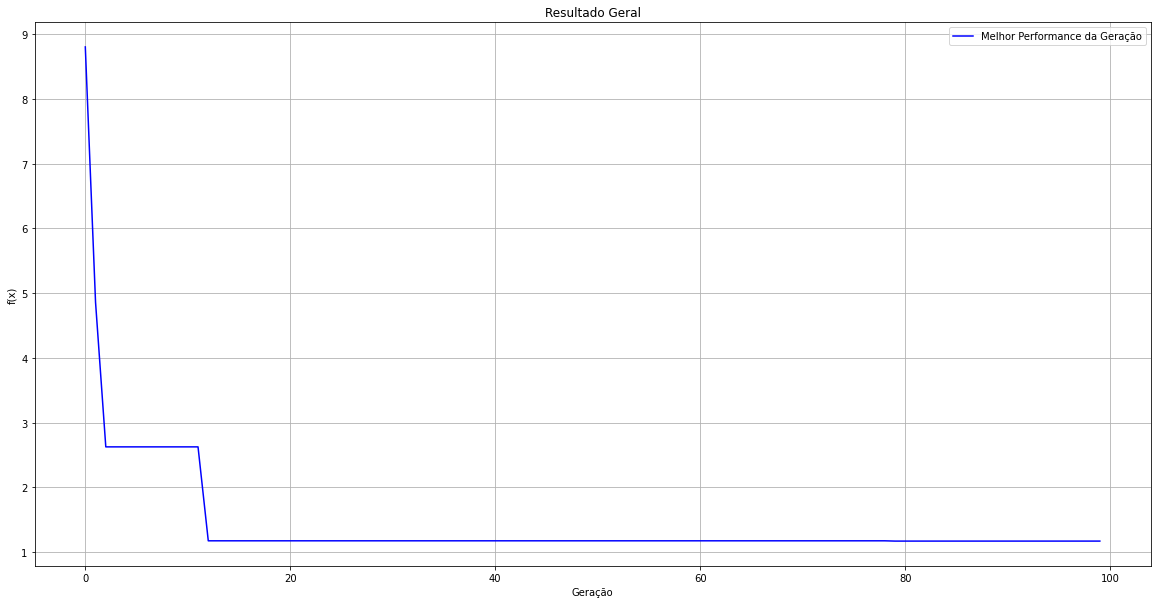

CPU times: user 529 ms, sys: 3.64 ms, total: 532 ms
Wall time: 540 ms


In [27]:
#Teste 7
%%time

qnt_part = 500
n_iter = 100
w_inertia = 1      #existe, mas n mexeremos
c1_personal_best = 0.1
c2_social_best = 1
lim_velocidade = 2  #saturação
lim_pos = 5.12    #limitar posição, para seguir a exigencia da função rastrigin
seed = 42

minimumPSO,pointMin = PSO(qnt_part,n_iter,w_inertia,c1_personal_best,c2_social_best,lim_velocidade,lim_pos,seed)

O valor mínimo obtido foi 0.09218215902233595
Os valores numéricos de entrada que trouxeram esse resultado foram [0.009341659101310462, -0.0038448917005888816, 0.019053961237030625]


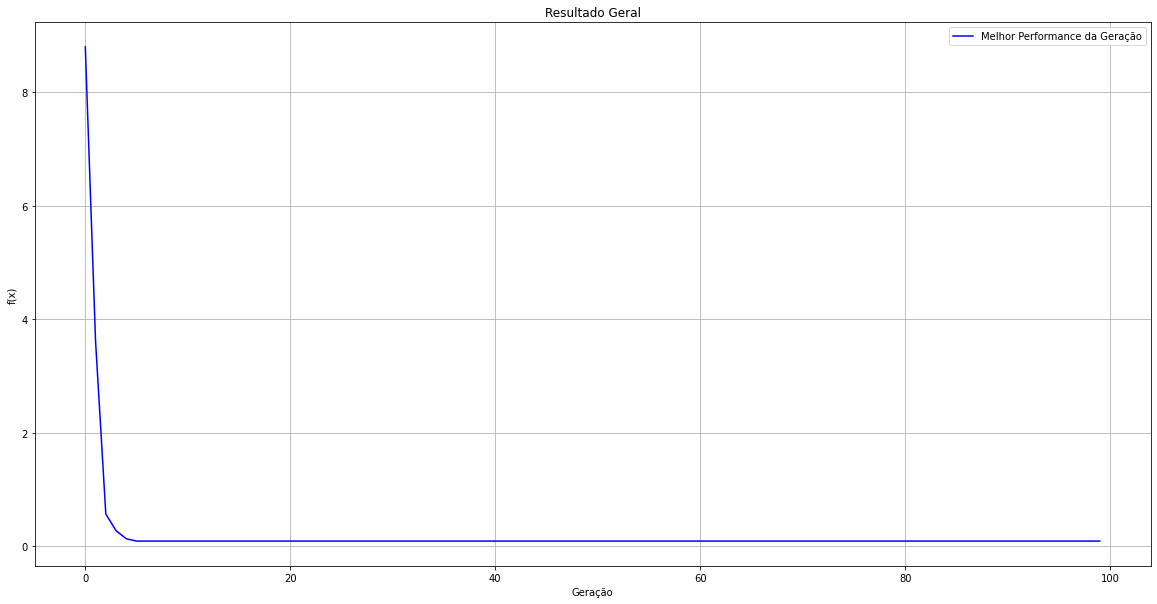

CPU times: user 542 ms, sys: 5.28 ms, total: 548 ms
Wall time: 554 ms


In [28]:
#Teste 8
%%time

qnt_part = 500
n_iter = 100
w_inertia = 1      #existe, mas n mexeremos
c1_personal_best = 0.5
c2_social_best = 0.5
lim_velocidade = 2  #saturação
lim_pos = 5.12    #limitar posição, para seguir a exigencia da função rastrigin
seed = 42

minimumPSO,pointMin = PSO(qnt_part,n_iter,w_inertia,c1_personal_best,c2_social_best,lim_velocidade,lim_pos,seed)

O valor mínimo obtido foi 0.008460165643965567
Os valores numéricos de entrada que trouxeram esse resultado foram [-0.0032272082823877613, 0.0014629452694293055, 0.005485609930991564]


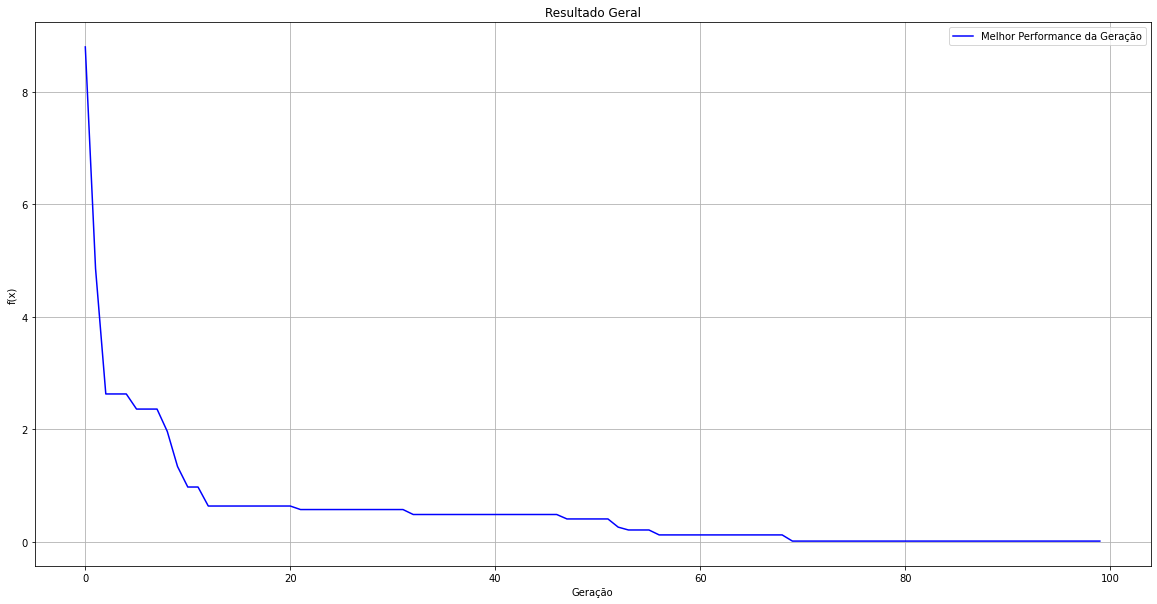

CPU times: user 498 ms, sys: 8.84 ms, total: 507 ms
Wall time: 512 ms


In [29]:
#Teste 9
%%time

qnt_part = 500
n_iter = 100
w_inertia = 1      #existe, mas n mexeremos
c1_personal_best = 0.5
c2_social_best = 1
lim_velocidade = 2  #saturação
lim_pos = 5.12    #limitar posição, para seguir a exigencia da função rastrigin
seed = 42

minimumPSO,pointMin = PSO(qnt_part,n_iter,w_inertia,c1_personal_best,c2_social_best,lim_velocidade,lim_pos,seed)

O valor mínimo obtido foi 0.00040057062967413515
Os valores numéricos de entrada que trouxeram esse resultado foram [0.0005626290494917341, -6.384894851311281e-05, 0.0013032526017891237]


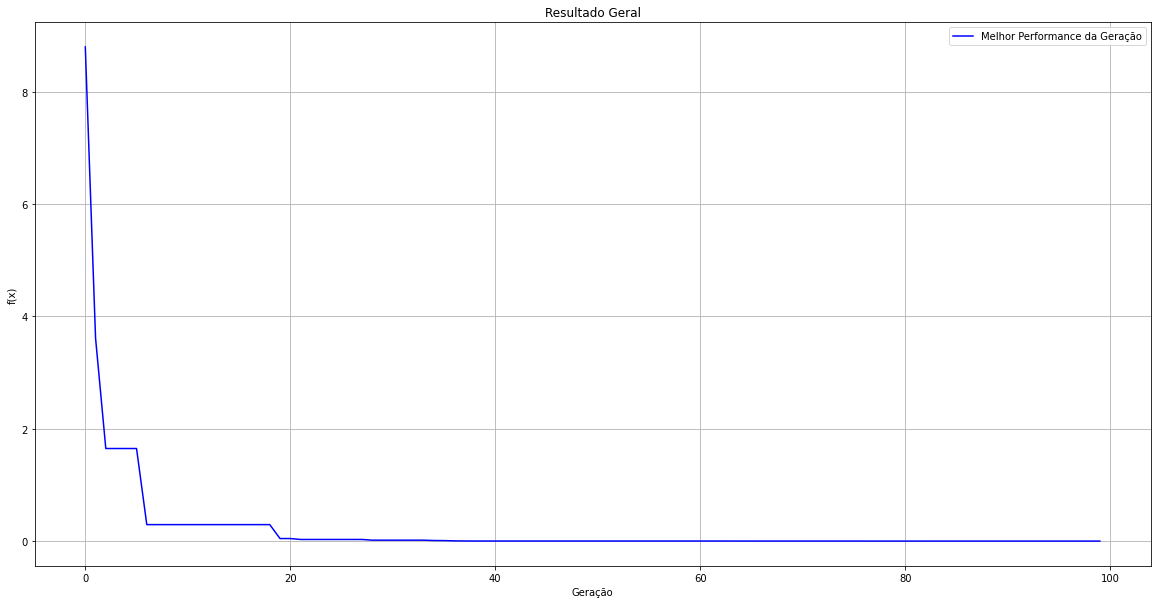

CPU times: user 526 ms, sys: 1.72 ms, total: 528 ms
Wall time: 537 ms


In [30]:
#Teste 10
%%time

qnt_part = 500
n_iter = 100
w_inertia = 1      #existe, mas n mexeremos
c1_personal_best = 1
c2_social_best = 0.5
lim_velocidade = 2  #saturação
lim_pos = 5.12    #limitar posição, para seguir a exigencia da função rastrigin
seed = 42

minimumPSO,pointMin = PSO(qnt_part,n_iter,w_inertia,c1_personal_best,c2_social_best,lim_velocidade,lim_pos,seed)

O valor mínimo obtido foi 0.2262607285952356
Os valores numéricos de entrada que trouxeram esse resultado foram [0.03243481919366076, -0.008966970892542392, 0.0034187353886703242]


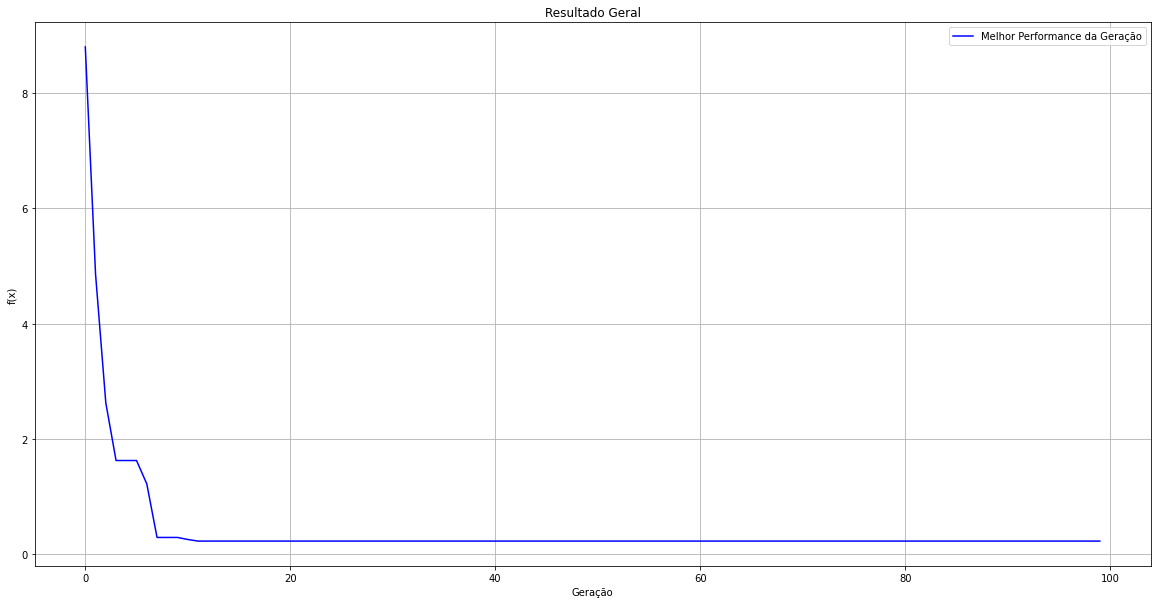

CPU times: user 509 ms, sys: 1.85 ms, total: 511 ms
Wall time: 520 ms


In [31]:
#Teste 11
%%time

qnt_part = 500
n_iter = 100
w_inertia = 1      #existe, mas n mexeremos
c1_personal_best = 1
c2_social_best = 1
lim_velocidade = 2  #saturação
lim_pos = 5.12    #limitar posição, para seguir a exigencia da função rastrigin
seed = 42

minimumPSO,pointMin = PSO(qnt_part,n_iter,w_inertia,c1_personal_best,c2_social_best,lim_velocidade,lim_pos,seed)

O valor mínimo obtido foi 1.629033267391833e-05
Os valores numéricos de entrada que trouxeram esse resultado foram [0.0002811221571669426, 4.689036329210729e-05, -2.9722940553713727e-05]


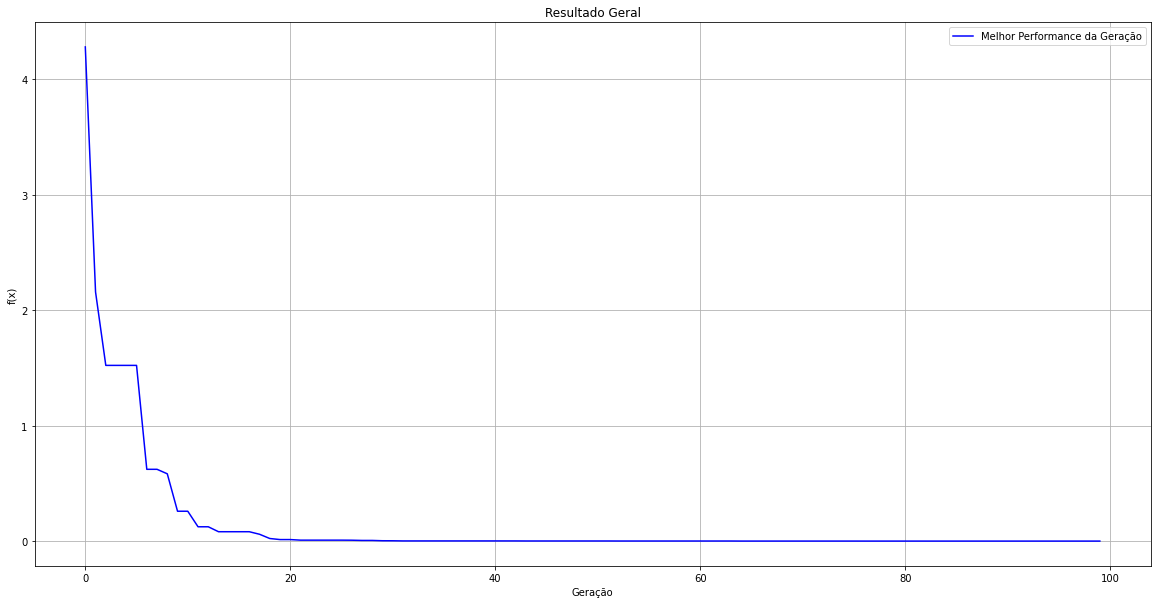

CPU times: user 775 ms, sys: 4.58 ms, total: 779 ms
Wall time: 783 ms


In [32]:
#Teste 12
%%time

qnt_part = 1000
n_iter = 100
w_inertia = 1      #existe, mas n mexeremos
c1_personal_best = 1
c2_social_best = 0.5
lim_velocidade = 2  #saturação
lim_pos = 5.12    #limitar posição, para seguir a exigencia da função rastrigin
seed = 42

minimumPSO,pointMin = PSO(qnt_part,n_iter,w_inertia,c1_personal_best,c2_social_best,lim_velocidade,lim_pos,seed)

O valor mínimo obtido foi 0.004217885909799435
Os valores numéricos de entrada que trouxeram esse resultado foram [-0.0006942537487737432, 0.002933248777619857, 0.0034892900498240814]


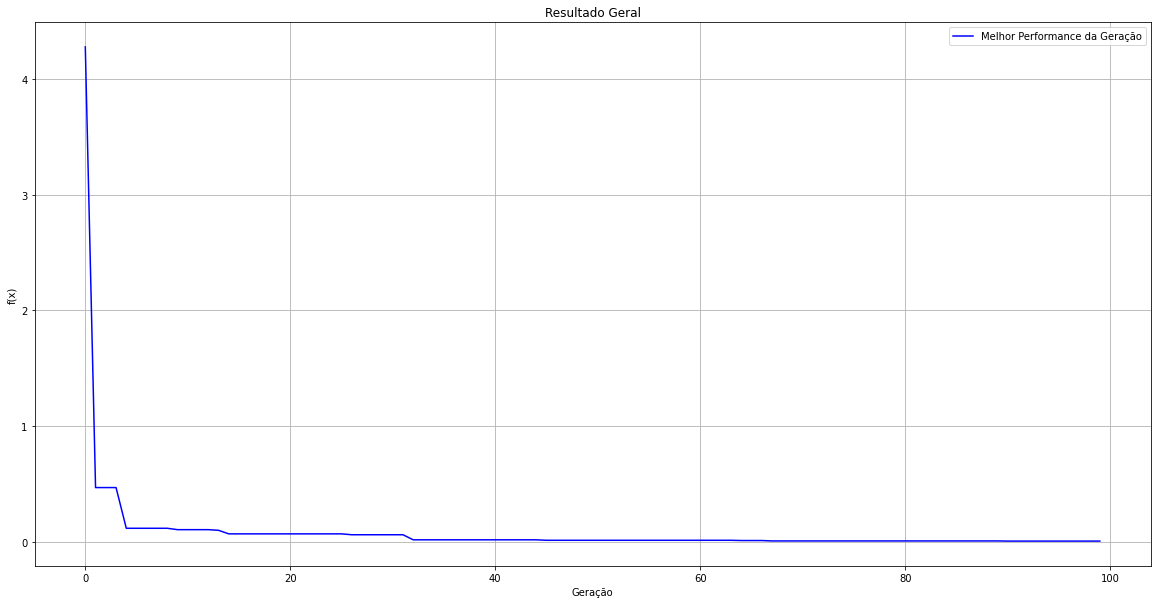

CPU times: user 822 ms, sys: 4.47 ms, total: 827 ms
Wall time: 842 ms


In [33]:
#Teste 13
%%time

qnt_part = 1000
n_iter = 100
w_inertia = 1      #existe, mas n mexeremos
c1_personal_best = 0.5
c2_social_best = 1
lim_velocidade = 2  #saturação
lim_pos = 5.12    #limitar posição, para seguir a exigencia da função rastrigin
seed = 42

minimumPSO,pointMin = PSO(qnt_part,n_iter,w_inertia,c1_personal_best,c2_social_best,lim_velocidade,lim_pos,seed)

O valor mínimo obtido foi 1.5214813960547264
Os valores numéricos de entrada que trouxeram esse resultado foram [-1.0251041947637782, -0.03607721951270748, -0.02124092647896947]


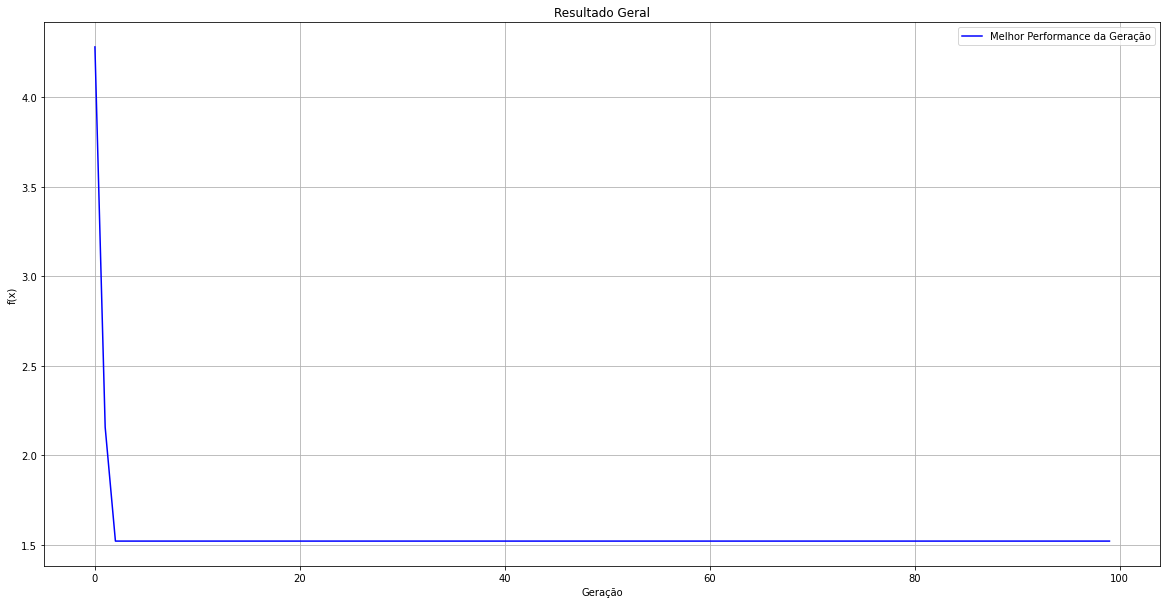

CPU times: user 814 ms, sys: 3.6 ms, total: 818 ms
Wall time: 828 ms


In [34]:
#Teste 14
%%time

qnt_part = 1000
n_iter = 100
w_inertia = 1      #existe, mas n mexeremos
c1_personal_best = 0.5
c2_social_best = 0.5
lim_velocidade = 2  #saturação
lim_pos = 5.12    #limitar posição, para seguir a exigencia da função rastrigin
seed = 42

minimumPSO,pointMin = PSO(qnt_part,n_iter,w_inertia,c1_personal_best,c2_social_best,lim_velocidade,lim_pos,seed)